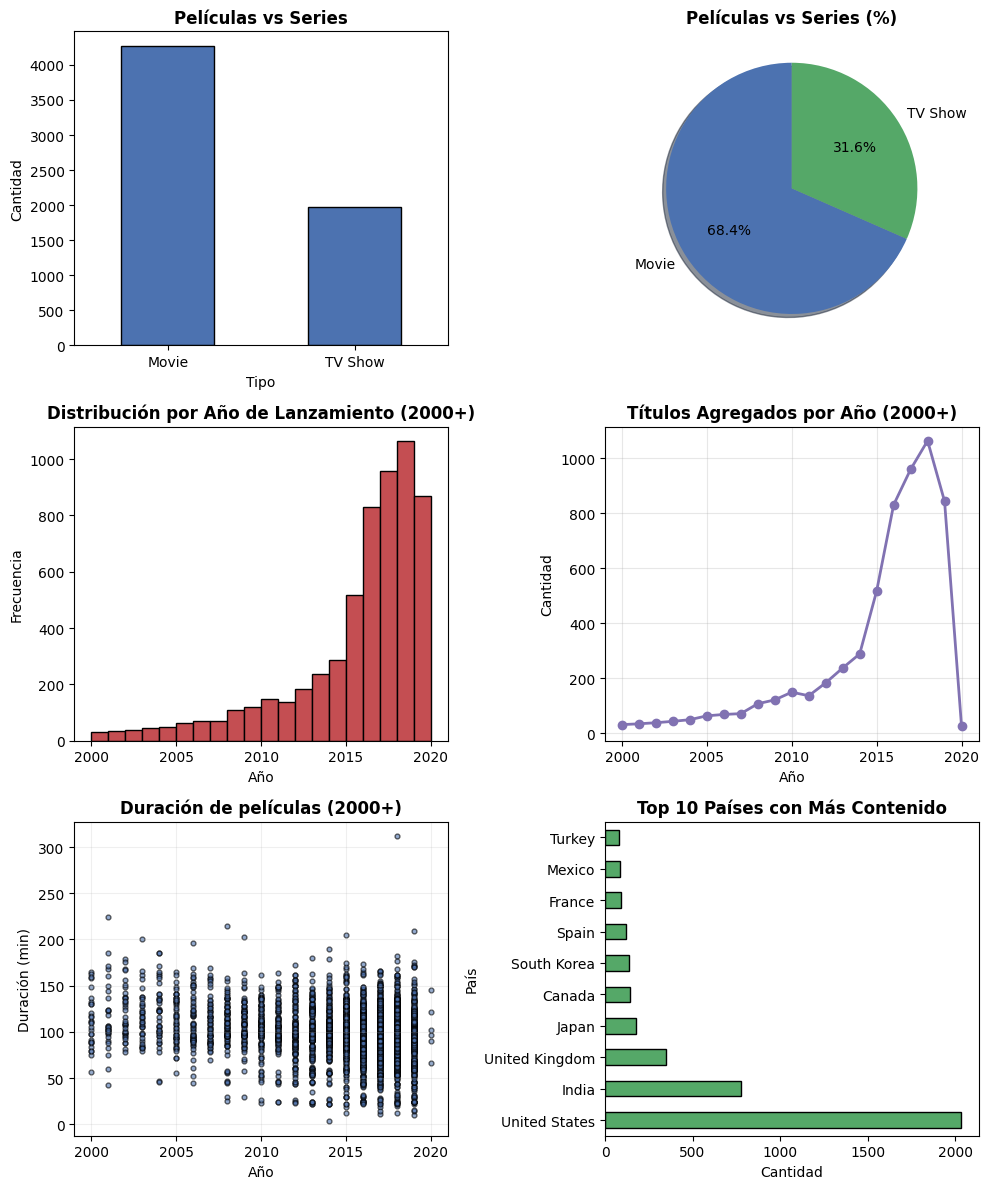

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("netflix_titles.csv")

plt.figure(figsize=(10, 12))

# Colores
color_bar = "#4C72B0"
color_pie = ["#4C72B0", "#55A868"]
color_hist = "#C44E52"
color_line = "#8172B2"
color_scatter = "#4C72B0"
color_barh = "#55A868"

# --- 1. Películas vs Series (barras)
plt.subplot(3, 2, 1)
df['type'].value_counts().plot(kind='bar', color=color_bar, edgecolor="black")
plt.title('Películas vs Series', fontsize=12, fontweight="bold")
plt.xlabel('Tipo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)

# --- 2. Películas vs Series (pie)
plt.subplot(3, 2, 2)
df['type'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    colors=color_pie,
    shadow=True,
    startangle=90
)
plt.title('Películas vs Series (%)', fontsize=12, fontweight="bold")
plt.ylabel('')

# --- 3. Distribución de años (histograma desde 2000)
plt.subplot(3, 2, 3)
df[df['release_year'] >= 2000]['release_year'].plot(
    kind='hist',
    bins=20,
    color=color_hist,
    edgecolor="black"
)
plt.title('Distribución por Año de Lanzamiento (2000+)', fontsize=12, fontweight="bold")
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# --- 4. Títulos agregados por año (línea)
plt.subplot(3, 2, 4)
df_moderno = df[df['release_year'] >= 2000]
df_moderno.groupby("release_year").size().plot(
    kind='line',
    marker='o',
    linewidth=2,
    color=color_line
)
plt.title("Títulos Agregados por Año (2000+)", fontsize=12, fontweight="bold")
plt.xlabel("Año")
plt.ylabel("Cantidad")
plt.grid(alpha=0.3)

# --- 5. Duración de películas (scatter)
plt.subplot(3, 2, 5)
peliculas = df[df['type'] == 'Movie'].copy()
peliculas['duration_int'] = peliculas['duration'].str.replace(' min', '').astype(int)

plt.scatter(
    peliculas[peliculas["release_year"] >= 2000]["release_year"],
    peliculas[peliculas["release_year"] >= 2000]["duration_int"],
    s=12,
    color=color_scatter,
    alpha=0.6,
    edgecolor="black"
)

plt.title('Duración de películas (2000+)', fontsize=12, fontweight="bold")
plt.xlabel('Año')
plt.ylabel('Duración (min)')
plt.grid(alpha=0.2)

# --- 6. Top 10 países con más contenido
plt.subplot(3, 2, 6)
df['country'].value_counts().head(10).plot(
    kind='barh',
    color=color_barh,
    edgecolor="black"
)
plt.title("Top 10 Países con Más Contenido", fontsize=12, fontweight="bold")
plt.xlabel("Cantidad")
plt.ylabel("País")

plt.tight_layout()
plt.show()
